# exerciseset01

## Problem 1

Your time series data are as follows.
1.146 -0.064 1.152 2.825 2.873 3.414 1.459 0.842 1.259 0.887 0.252 0.634 2.334 3.805 3.699 4.111 5.59 3.322 4.323 5.81
For these data (length 20), plot the times series, plot the acf, and get the acf function numerically. Do the same for the differenced series of length 19.

### Part a) Original Series Analysis

In [1]:
data <- c(1.146, -0.064, 1.152, 2.825, 2.873, 3.414, 1.459, 0.842, 1.259, 0.887, 0.252, 0.634, 2.334, 3.805, 3.699, 4.111, 5.59, 3.322, 4.323, 5.81)

Creates a vector (list of numbers) named data containing 20 time series observations. The c() function combines values into a vector.

In [2]:
ts_data <- ts(data, frequency = 1)

Converts regular vector into a time series object using ts(). The frequency = 1 means non-seasonal data (one observation per time period). This special object type allows R to recognize it as time series data for plotting and analysis.

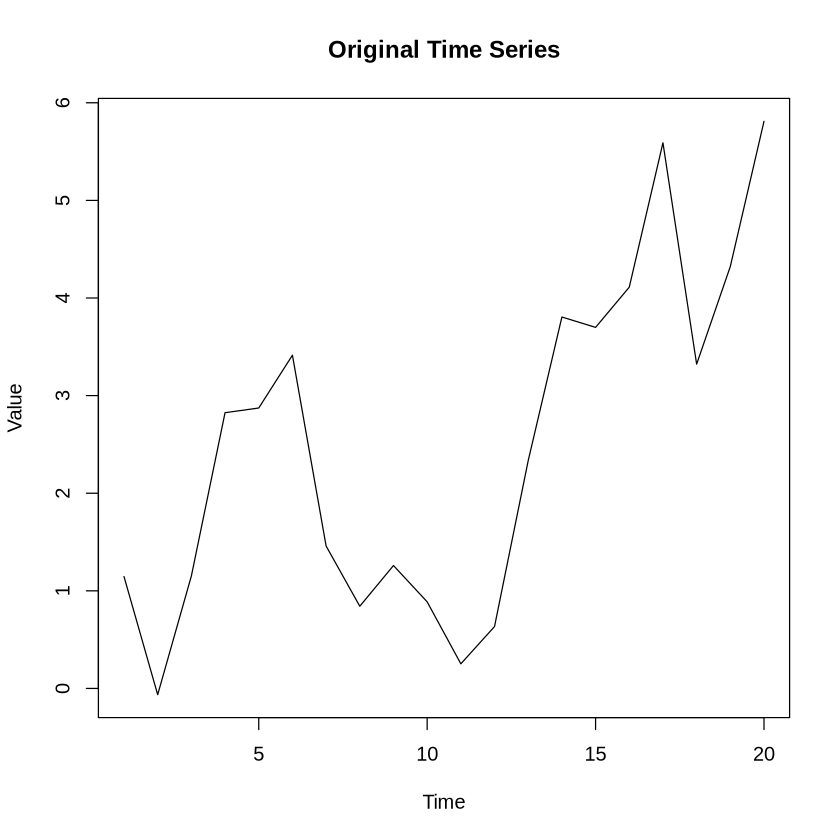

In [3]:
plot(ts_data, main = "Original Time Series", ylab = "Value")

Creates a time series plot where time is on x-axis and values on y-axis. The main = adds a title; ylab = labels the y-axis. Points are automatically connected with line segments, as standard for time series plots.

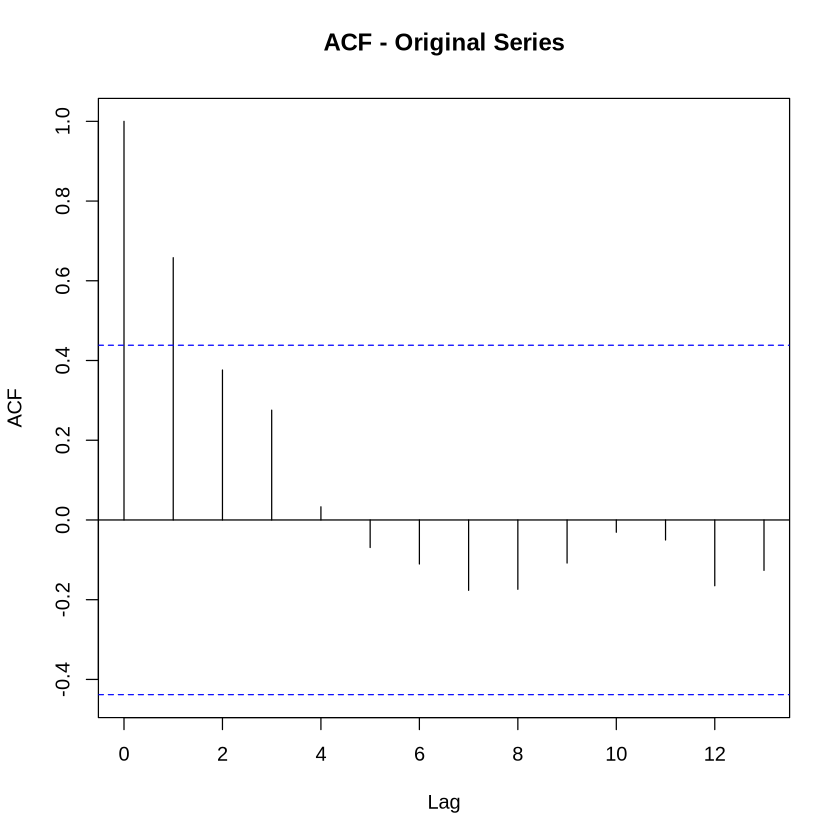

In [4]:
acf(ts_data, main = "ACF - Original Series")

Plots the autocorrelation function, showing vertical bars for each lag's correlation. Blue dotted horizontal lines indicate significance bounds; bars exceeding these show significant serial correlation.

In [5]:
acf_original <- acf(ts_data, plot = FALSE)

Computes ACF values without displaying a plot (plot = FALSE) and stores results in acf_original. This object contains the numerical values you need to extract.

In [6]:
print("Part a) Serial corrlelations for lags 1, 2, 3: ")
print(acf_original$acf[2:4])

[1] "Part a) Serial corrlelations for lags 1, 2, 3: "
[1] 0.6579139 0.3761787 0.2754533


Displays text, then extracts lags 1, 2, 3, from the ACF object.
- acf_original$acf accesses the correlation values
- [2:4] extracts positions 2-4 (lag 0 is position 1, so lags 1-3 are positions 2-4)

### Part b) Differenced Series Analysis

In [7]:
diff_data <- diff(ts_data)

Computes first differences: $\nabla y_t = y_t – y_{t-1}$. This removes trends by subtracting each value from the next, creating a new series of length 19.

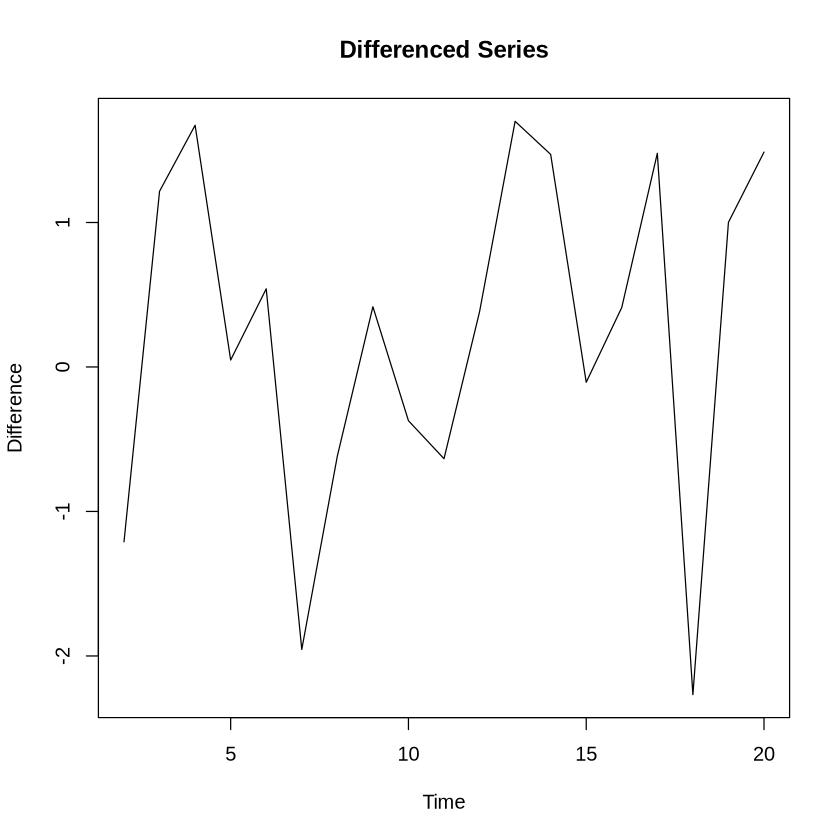

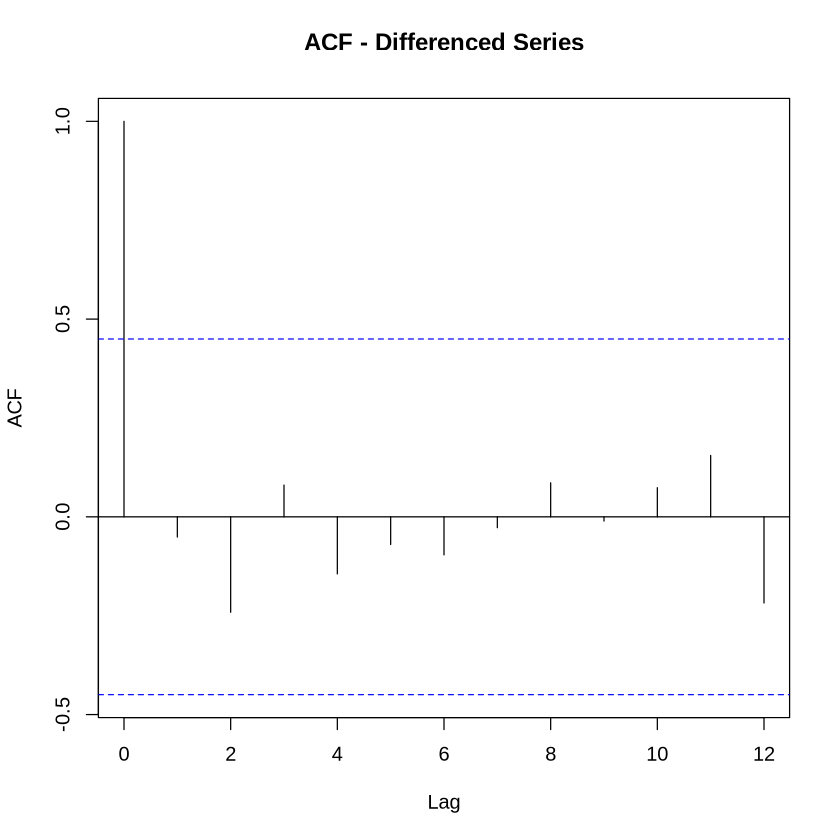

In [8]:
plot(diff_data, main = "Differenced Series", ylab = "Difference")
acf(diff_data, main = "ACF - Differenced Series")

Creates time series plot and ACF plot for the differenced data, same as Part a) but applied to the differences.

In [9]:
acf_diff <- acf(diff_data, plot = FALSE)
print("Part b) Serial correlations for lags 1, 2, 3: ")
print(acf_diff$acf[2:4])

[1] "Part b) Serial correlations for lags 1, 2, 3: "
[1] -0.05107237 -0.24127530  0.08024074


Extracts numerical ACF values for lags 1, 2, 3 from the differenced series, identical process to Part a).

## Problem 2

Your time series data are as follows. \
-0.12 1.01 1.523 0.292 0.799 0.53 0.134 0.172 0.19 -1.131 -0.121 -1 -1.648 -1.659 1.52 1.778 2.456 1.045 0.209 -0.443 \
For these data, plot the times series, plot the acf, and get the acf function numerically. Consider this as the training set.

### Part a) Original Series Analysis

In [10]:
# Enter the NEW training set data
data <- c(-0.12, 1.01, 1.523, 0.292, 0.799, 0.53, 0.134, 0.172, 
          0.19, -1.131, -0.121, -1, -1.648, -1.659, 1.52, 1.778, 
          2.456, 1.045, 0.209, -0.443)
# Create time series object
ts_data <- ts(data, frequency=1)

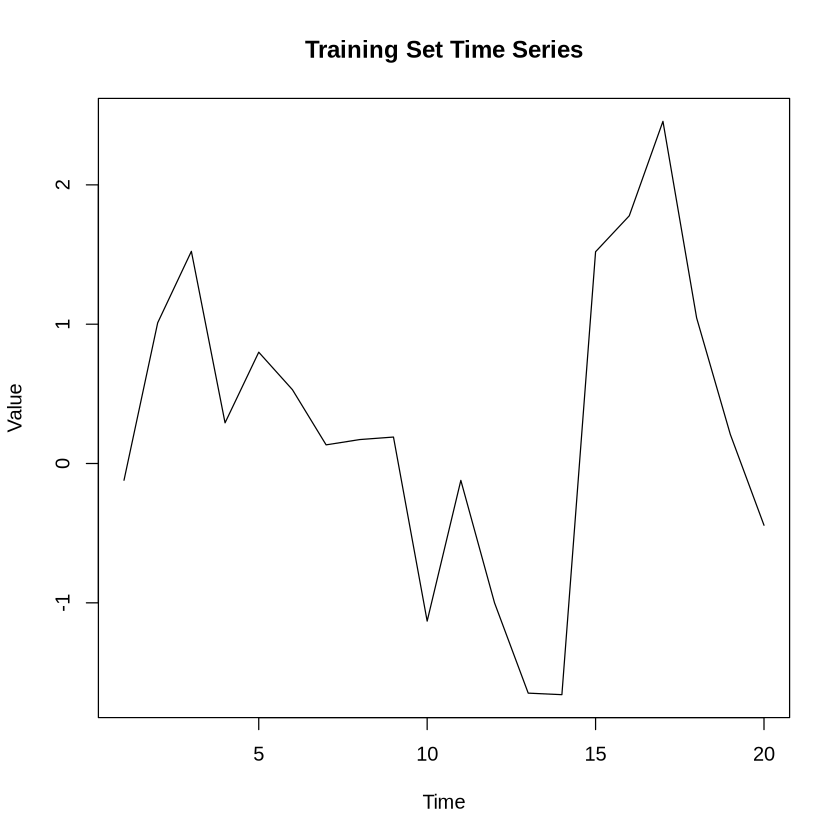

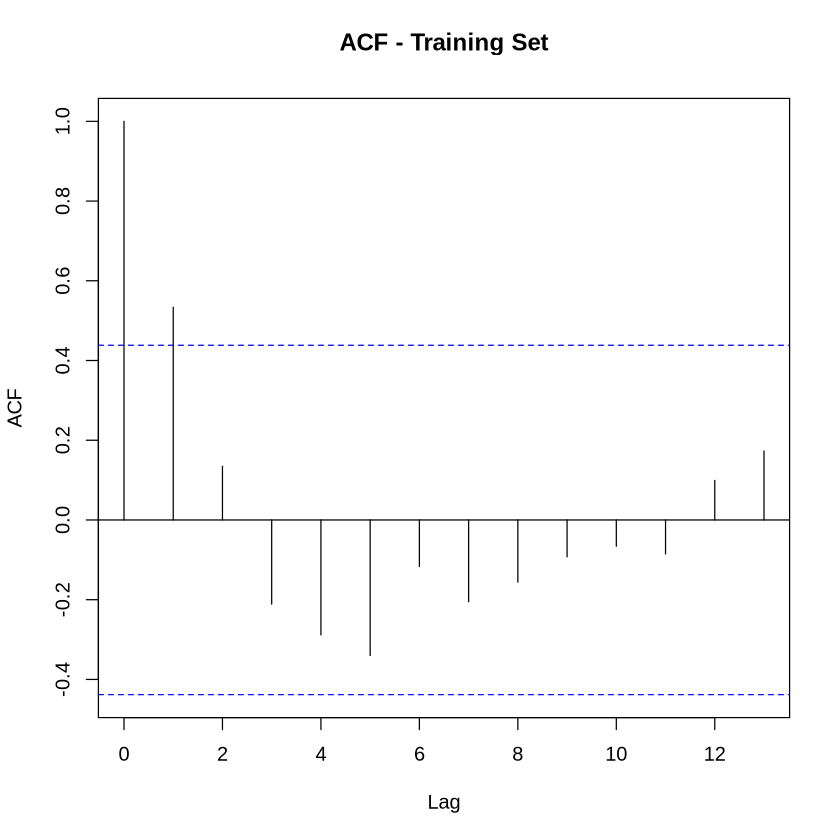

In [11]:
# Plot the time series
plot(ts_data, main="Training Set Time Series", ylab="Value")

# Plot ACF
acf(ts_data, main="ACF - Training Set")

In [12]:
# Get numerical ACF values
acf_values <- acf(ts_data, plot = FALSE)
print("Part a) Serial correlations for lags 1,2,3:")
print(acf_values$acf[2:4])  # Lags 1, 2, 3

[1] "Part a) Serial correlations for lags 1,2,3:"
[1]  0.5336793  0.1345185 -0.2111593


### Part b) Least Squares Regression & Forecast Rule/Root Mean Square Errors

In [13]:
# Training set
training <- c(-0.12, 1.01, 1.523, 0.292, 0.799, 0.53, 0.134, 0.172, 
              0.19, -1.131, -0.121, -1, -1.648, -1.659, 1.52, 1.778, 
              2.456, 1.045, 0.209, -0.443)

In [14]:
# Create lagged variables
y_current <- training[2:20]   # y_t (response)
y_lagged <- training[1:19]     # y_(t-1) (predictor)

In [15]:
# Fit linear regression
model <- lm(y_current ~ y_lagged)
summary(model)


Call:
lm(formula = y_current ~ y_lagged)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36064 -0.67404 -0.03198  0.66813  2.29936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.1260     0.2351   0.536   0.5991  
y_lagged      0.5457     0.2056   2.654   0.0167 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9853 on 17 degrees of freedom
Multiple R-squared:  0.2929,	Adjusted R-squared:  0.2514 
F-statistic: 7.043 on 1 and 17 DF,  p-value: 0.0167


In [16]:
# Extract coefficients
intercept <- coef(model)[1]
slope <- coef(model)[2]

In [17]:
print(paste("Intercept:", round(intercept, 6)))
print(paste("Slope:", round(slope, 6)))

[1] "Intercept: 0.125961"
[1] "Slope: 0.5457"


In [18]:
# Training set data
training <- c(-0.12, 1.01, 1.523, 0.292, 0.799, 0.53, 0.134, 0.172, 
              0.19, -1.131, -0.121, -1, -1.648, -1.659, 1.52, 1.778, 
              2.456, 1.045, 0.209, -0.443)

# Holdout set (actual observations at times 21-25)
holdout <- c(0.248, -0.502, 1.054, -0.151, -0.937)

# Regression parameters from Part b
intercept <- 0.125961
slope <- 0.545700

# ============================================
# FORECASTS FOR OBSERVATION 21
# ============================================

# 1. Persistence forecast
y_20 <- training[20]
forecast_21_persistence <- y_20
cat("Forecast for time 21 (Persistence):", forecast_21_persistence, "\n")

# 2. Average in training set
training_mean <- mean(training)
forecast_21_average <- training_mean
cat("Forecast for time 21 (Average):", forecast_21_average, "\n")

# 3. Regression on most recent previous
forecast_21_regression <- intercept + slope * y_20
cat("Forecast for time 21 (Regression):", forecast_21_regression, "\n")

# ============================================
# CALCULATE ALL FORECASTS FOR TIMES 21-25
# ============================================

n_holdout <- length(holdout)
forecasts_persistence <- numeric(n_holdout)
forecasts_average <- numeric(n_holdout)
forecasts_regression <- numeric(n_holdout)

for (i in 1:n_holdout) {
  if (i == 1) {
    # For time 21, use last training observation
    prev_value <- training[20]
  } else {
    # For times 22-25, use previous actual holdout value
    prev_value <- holdout[i-1]
  }
  
  # Three forecast rules
  forecasts_persistence[i] <- prev_value
  forecasts_average[i] <- training_mean
  forecasts_regression[i] <- intercept + slope * prev_value
}

# Display forecasts
results <- data.frame(
  Time = 21:25,
  Actual = holdout,
  Persistence = forecasts_persistence,
  Average = forecasts_average,
  Regression = forecasts_regression
)
print(results)

# ============================================
# CALCULATE RMSE FOR EACH RULE
# ============================================

# Forecast errors
errors_persistence <- holdout - forecasts_persistence
errors_average <- holdout - forecasts_average
errors_regression <- holdout - forecasts_regression

# RMSE = sqrt(mean(errors^2))
rmse_persistence <- sqrt(mean(errors_persistence^2))
rmse_average <- sqrt(mean(errors_average^2))
rmse_regression <- sqrt(mean(errors_regression^2))

# Display RMSE results
cat("\n=== RMSE RESULTS ===\n")
cat("Forecast RMSE (Persistence):", rmse_persistence, "\n")
cat("Forecast RMSE (Average in training set):", rmse_average, "\n")
cat("Forecast RMSE (Regression on previous):", rmse_regression, "\n")

# Create RMSE summary
rmse_summary <- data.frame(
  Forecast_Rule = c("Persistence", "Average", "Regression"),
  RMSE = c(rmse_persistence, rmse_average, rmse_regression)
)
print(rmse_summary)


Forecast for time 21 (Persistence): -0.443 
Forecast for time 21 (Average): 0.2768 
Forecast for time 21 (Regression): -0.1157841 
  Time Actual Persistence Average Regression
1   21  0.248      -0.443  0.2768 -0.1157841
2   22 -0.502       0.248  0.2768  0.2612946
3   23  1.054      -0.502  0.2768 -0.1479804
4   24 -0.151       1.054  0.2768  0.7011288
5   25 -0.937      -0.151  0.2768  0.0435603

=== RMSE RESULTS ===
Forecast RMSE (Persistence): 1.051755 
Forecast RMSE (Average in training set): 0.7573271 
Forecast RMSE (Regression on previous): 0.8771928 
  Forecast_Rule      RMSE
1   Persistence 1.0517545
2       Average 0.7573271
3    Regression 0.8771928
